# ATU - Programming and Scripting Project 2023
### Author: Norbert Antal

## Summary of the Iris dataset

The Iris flower data set, also known as Fisher’s Iris data set, is a multivariate data set that was introduced by British statistician and biologist Ronald Fisher. <br>The data was collected by Edgar Anderson to quantify the morphologic variation of Iris flowers of three related species and was utilised by Fisher to demonstrate the use of linear discriminant analysis in his 1936 paper titled “The use of multiple measurements in taxonomic problems” published in the Annals of Eugenics.
<br>Today the dataset is widely used as a typical test case for statistical classification in machine learning. 
The Iris dataset contains 50 samples of three Iris flower species: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features measured in centimetres: sepal and petal length and width. Using these four variables, Ronald Fisher developed a linear discriminant model to differentiate between the species.*(Ref: Wikipedia 2023, (https://en.wikipedia.org/wiki/Iris_flower_data_set)*

Loading modules

In [1]:
import numpy as np # for mathematicalfunctions
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for creating graphical representation of data
import seaborn as sns # # for creating prettier graphical representation of data
import os # for file operations

#### Loading dataset and add headers
(iris.data and iris.names files downloaded from https://archive.ics.uci.edu/ml/datasets/iris)
Read in iris dataset from filename stored in 'SOURCEDATA'
+ adding headers
+ combine with pandas dataframe

In [2]:
SOURCEDATA="iris.data" # store filename
# create headers taking header names manually from "iris.names" source file
headers=[
    "sepal length (cm)", 
    "sepal width (cm)", 
    "petal length (cm)", 
    "petal width (cm)",
    "species"]
# combine the two into a dataframe using pandas read_csv function and store the dataframe in 'df' //read_csv ref: (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
df=pd.read_csv(SOURCEDATA, names=headers)

Create summary of data using pandas .describe() function // ref: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [3]:
df.describe() #ref: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Output summary to a text file

In [4]:
summary=df.describe()
output=(f"THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET\n\n {summary}")
with open('summary.txt','w') as f:
    #f.write("THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET\n",df.describe().to_string())
    f.write(output)

Create histogram of each variable and save results in png files

In [5]:
# create a function to draw up histograms with column data as variable
# ref: https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/
# ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html
def fn_hist(column):
    plt.style.use('fast') #using stypes ref: https://matplotlib.org/stable/gallery/style_sheets/index.html
    plt.grid(True, color="#7e9964", linestyle="dotted")
    df[column].hist(bins=10, color="#5a4fcf")
    plt.suptitle(f"Histogram of {column}")
    plt.show() # turns out plt.show() must be left in the end of the function to avoide having all histograms on one plot 💁

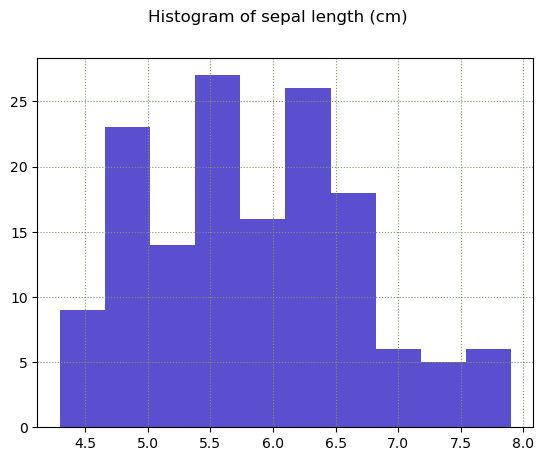

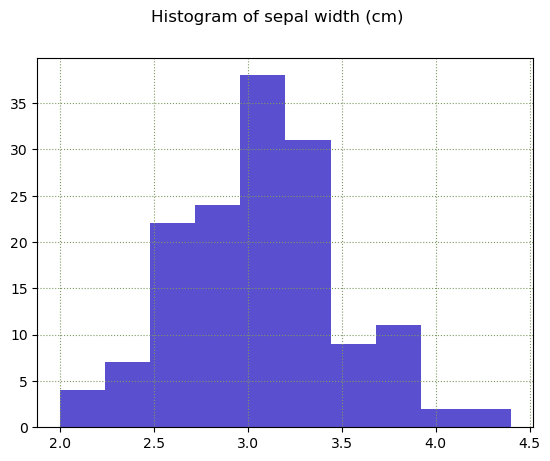

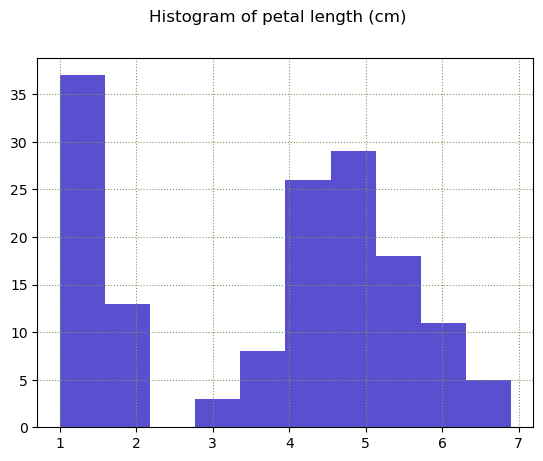

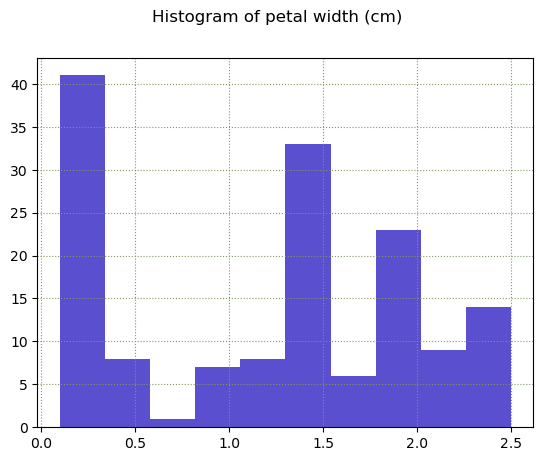

In [6]:
#create a for loop to cycle through the measurements in iris data and call the 'fn_hist' function to draw the histograms with each variable as per their column label
cols=headers[:-1] # created shorter list from 'headers' to avoid including the 'species column' which is not a measurement. Short list stored in 'cols'
for c in cols:
    fn_hist(c)

save histogram of each variable to png files

In [7]:
# adding save to .png file feature to the previous function to save the histograms with column data as variable and column name as file name
def fn_pnghist(column):
    plt.style.use('fast')
    plt.grid(True, color="#7e9964", linestyle="dotted")
    df[column].hist(bins=10, color="#5a4fcf")
    plt.suptitle(f"Histogram of {column}")
    plt.savefig(f"{column}.png") # save plot ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
    plt.show() # turns out plt.show() must be left in the end of the function to avoide having all histograms on one plot 💁


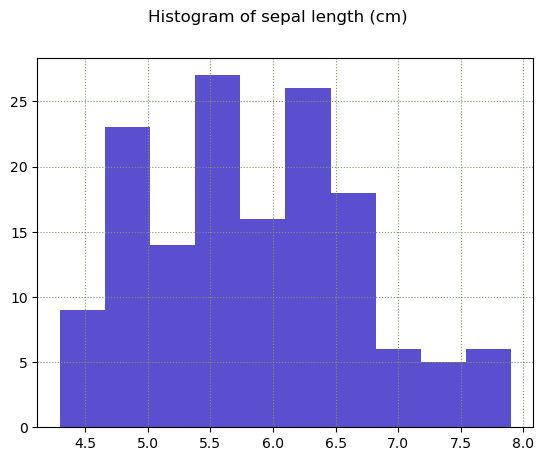

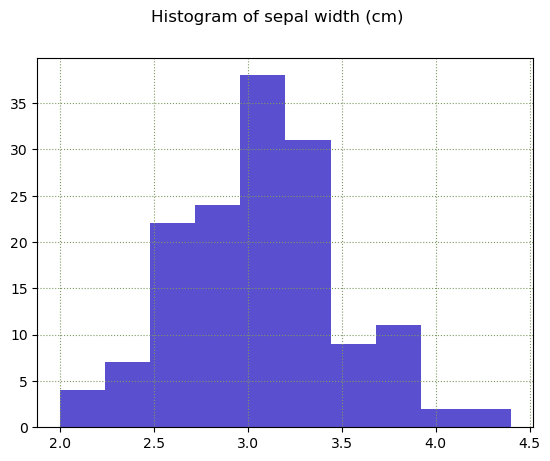

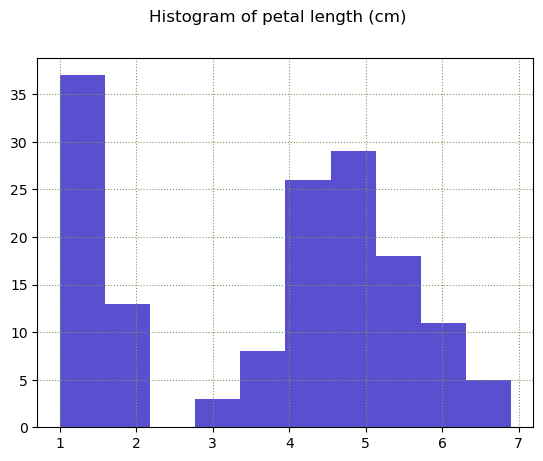

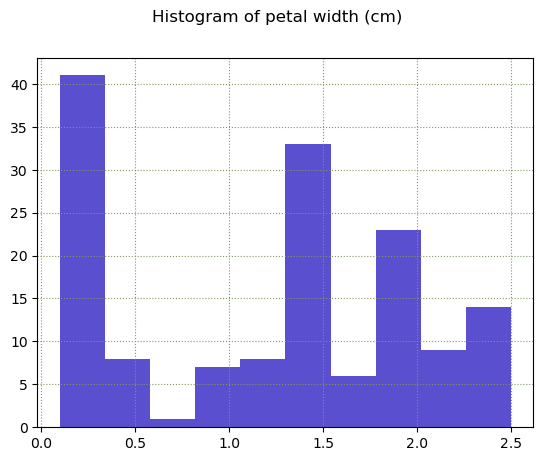

In [8]:
#create a for loop to cycle through the measurements in iris data and call the 'fn_hist' function to draw the histograms with each variable as per their column label
cols=headers[:-1] # created shorter list from 'headers' to avoid including the 'species column' which is not a measurement. Short list stored in 'cols'
for c in cols:
    fn_pnghist(c)

Create a scatter plot of each pair of variables and output the result into one .png file

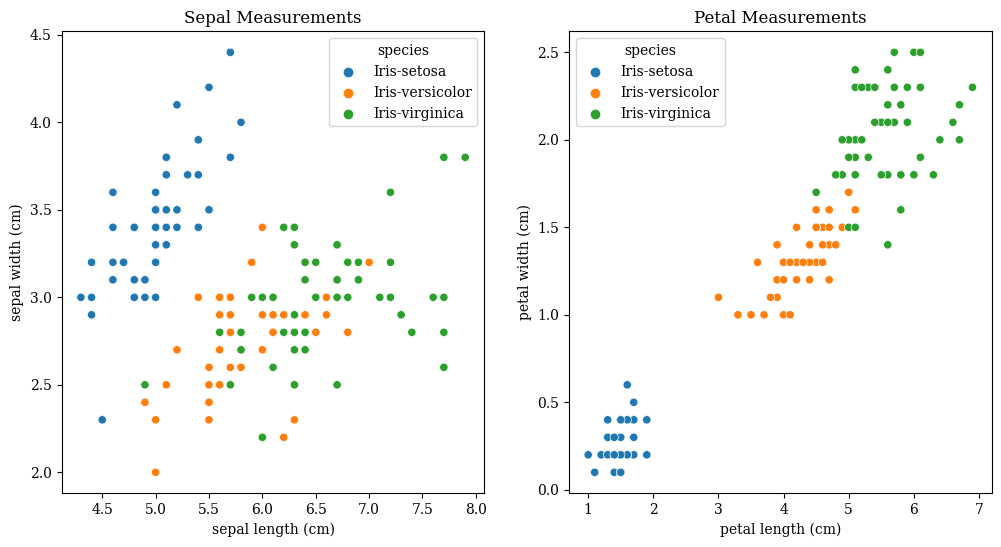

In [9]:
#-----Set plot style 
plt.style.use('fast') #ref: https://matplotlib.org/stable/gallery/style_sheets/index.html
plt.rc("font", family="serif")# default text style ref: customise default style ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

#-----two plots side by side ref: https://realpython.com/python-matplotlib-guide/#subplots, ref: https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(12, 6)) #create a plot object with 2 subplots (specified in 'ncols') and set plotsize 12x6

#-----1. draw scatter plot for sepal variables which are the first two headers stored in 'ax_x' and 'ax_y'
ax_x = headers[0] #"sepal width (cm)"
ax_y = headers[1] #"sepal length (cm)"
sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[0])
#-----labels and title for above
axes[0].set_xlabel(ax_x)
axes[0].set_ylabel(ax_y)
axes[0].set_title("Sepal Measurements")
#-----2. draw scatter plot for petal variables which are the next two headers stored in 'ax_x' and 'ax_y'
ax_x = headers[2] #"petal width (cm)"
ax_y = headers[3] #"petal length (cm)"
sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[1])
#-----labels and title for above
axes[1].set_xlabel(ax_x)
axes[1].set_ylabel(ax_y)
axes[1].set_title("Petal Measurements")

#------output to -png
plt.savefig(f"scatters.png")
plt.show()

It's quite clear from the two scatter plots that the best way to visualise the differences between the three Iris species is the scatterplot of the Petal measurements. 

Another way to summarise and visualise the relationships within the data is to run a Seaborn Pairplot. <br>This creates a nice visualisation summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it. ref: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us,to%20become%20familiar%20with%20it.


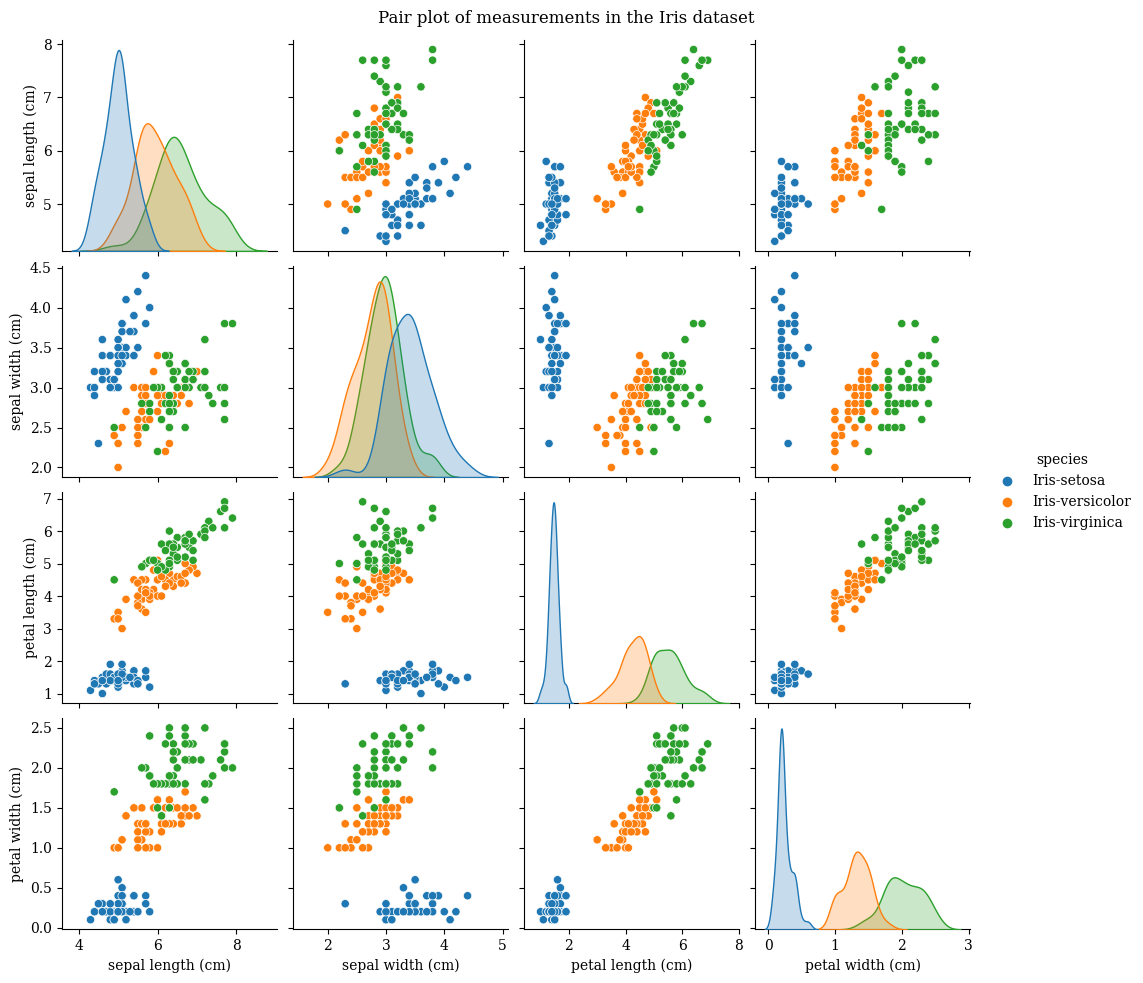

In [28]:
sns.pairplot(df, hue="species")
plt.suptitle("Pair plot of measurements in the Iris dataset") # set title
plt.subplots_adjust(top=0.95) # reducing size of the plot to make more room for the title.
#------output to -png
plt.savefig(f"pairplot.png")
plt.show()

Once again the visualisation of the Iris data shows that the best way to tell apart the different Iris species is to look at the petal measurements. Iris-setosa petal measurements are completely isolate from versicolor and virginica while the latter overlaps

If we were to identify species in future samples without counting chromosomes we can use the min and max measurements of petal dimensions for each species;

In [75]:
irises=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in irises:
    #print(i)
    print(i,'\n',df.loc[df['species']==i][headers[2:4]].describe().loc[['min','max']]) 
    # pandas tutorial to filter data ref: https://www.youtube.com/watch?v=vmEHCJofslg&t=111s
    # limit describe output ref: https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe, 



Iris-setosa 
      petal length (cm)  petal width (cm)
min                1.0               0.1
max                1.9               0.6
Iris-versicolor 
      petal length (cm)  petal width (cm)
min                3.0               1.0
max                5.1               1.8
Iris-virginica 
      petal length (cm)  petal width (cm)
min                4.5               1.4
max                6.9               2.5


Based on above data, a sample is most likely
Iris-setosa with max petal lenght at 1.9cm and max petal with at 0.6cm
Iris-versicolor with petal lenght between 3.0-4.5cm and petal width between 1.0-1.4cm
Iris-virginica with petal lenght between 5.1-6.9cm and petal width between 1.8-2.5cm

Unfortunately there will be a mixed bag of Iris-versicolor and Iris-virginica with petal lenght between 4.5-5.1cm and petal width between 1.4-1.8cm, these will require a chromosome count to identify the sepcies.